# **CRISP-DM Approach**
The **CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (CRISP-DM) is a process model with six steps that naturally describes the data science life cycle. 

1. Business understanding – What does the business need?
2. Data understanding – What data do we have / need? Is it clean?
3. Data preparation – How do we organize the data for modeling?
4. Modeling – What modeling techniques should we apply?
5. Evaluation – Which model best meets the business objectives?
5. Deployment – How do stakeholders access the results?

<p align="center">
<img src="https://www.ibm.com/docs/en/SS3RA7_sub/modeler_crispdm_ddita/clementine/images/crisp_process.jpg" alt="crispdm" title="image Title" width="400"> <br>
CRISP DM Methodology src: ibm.com
</p>

## **Business Understanding**
There is uncertainty in the stock market process. Therefore, stock price forecasts are very important in finance and business.Basically the stock price forecasts are intended to determine the future development of the stock value of financial stock exchanges. Accurately predicting stock price movements can increase investor profits.


## **Data Understanding**

In [ ]:
# Importing libraries

# Import the numpy and pandas package

import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Data visualisation
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

# Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Mounting drive for importing dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset used in this notebook is New York Stock Exchange from https://www.kaggle.com/datasets/dgawlik/nyse?datasetId=854&searchQuery=regression

Dataset consists:

prices.csv: raw, as-is daily prices. Most of data spans from 2010 to the end 2016, for companies new on stock market date range is shorter. There have been approx. 140 stock splits in that time, this set doesn't account for that.



In [ ]:
# Reading dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prices.csv")
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
# There are a lot of stock prices in this dataset but in this notebook we choose Merck & co Index stock prices
df_stock=df[df['symbol']=='MRK']
df_stock.head()

,date,symbol,open,close,low,high,volume
542,2010-01-04,MRK,36.820000,37.009998,36.549999,37.250000,13896500.0
1010,2010-01-05,MRK,37.299999,37.160000,36.930000,37.450001,14744800.0
1478,2010-01-06,MRK,37.209999,37.660000,36.900002,37.730000,15239900.0
1946,2010-01-07,MRK,37.470001,37.720001,37.400002,37.900002,11916600.0
2414,2010-01-08,MRK,37.869999,37.700001,37.430000,37.889999,10767100.0


Finding basic information of the dataset such as shape, data types, columns,and statistic summary.

In [ ]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 542 to 851074
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


In [ ]:
df_stock.shape

(1762, 7)

In [ ]:
df_stock.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [ ]:
df_stock.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,47.027236,47.030488,46.647247,47.396708,1.319393e+07
std,9.884314,9.883336,9.817006,9.954500,6.829575e+06
min,29.790001,29.809999,29.469999,30.910000,2.980100e+06
25%,37.212500,37.165000,36.892500,37.430000,9.086575e+06
50%,47.130001,47.230000,46.795000,47.514999,1.160825e+07
75%,56.840000,56.810001,56.390002,57.367500,1.502952e+07
max,64.540001,64.959999,64.519997,65.459999,7.429440e+07


# **Data Preparation**

In [ ]:
# Checking missing values
df_stock.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

There is not missing value

In [ ]:
# Drop column symbol
df_stock = df_stock.drop('symbol', 1)

# Choosing close column
df_stock = df_stock[['date', 'close']]


# Changing the index to date
df_stock['date'] = pd.to_datetime(df_stock['date'])

# Reseting the index
df_stock = df_stock.reset_index(drop=True)

df_stock.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,date,close
0,2010-01-04,37.009998
1,2010-01-05,37.160000
2,2010-01-06,37.660000
3,2010-01-07,37.720001
4,2010-01-08,37.700001


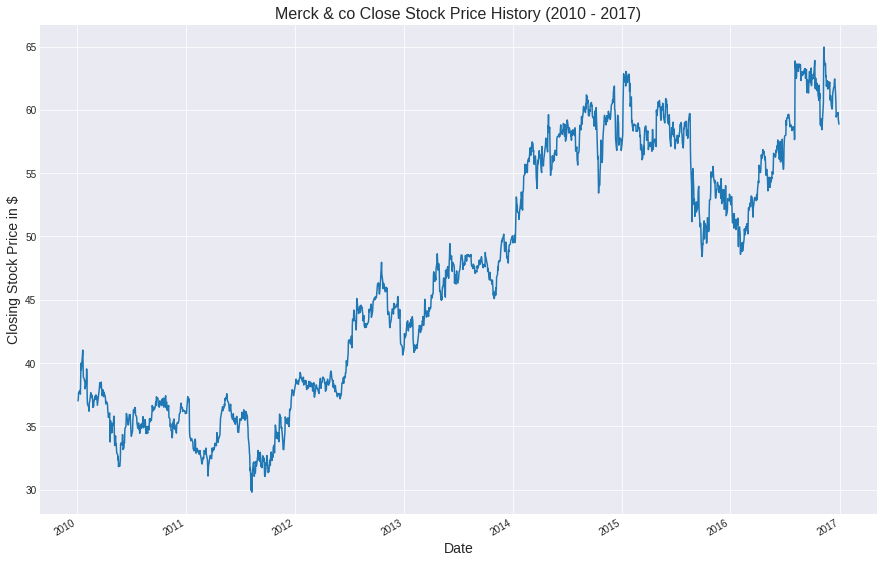

In [ ]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(  figsize=(15,10))
ax.plot(df_stock['date'], df_stock['close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Merck & co Close Stock Price History (2010 - 2017)', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [ ]:
# Split data into train 80% and test 20%
train, test = train_test_split(df_stock, test_size=0.20)

In [ ]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['close']

# **Modeling**


In [ ]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)    

LinearRegression()

In [ ]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.01766776944324783
Intercept:  31.472005241486784


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


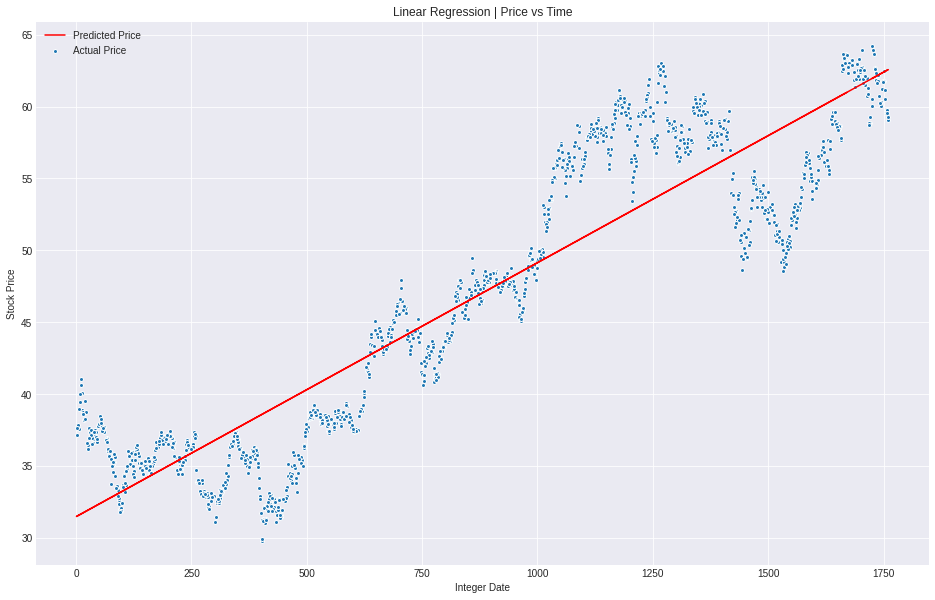

In [ ]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Predicting with the model

In [ ]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['close']

In [ ]:
# Generate array with predicted values
y_pred = model.predict(X_test)

# **Evaluation**


In [ ]:
# Add new column for predictions to df
df_stock['prediction'] = model.predict(np.array(df_stock.index).reshape(-1, 1))

In [ ]:
# Get number of rows in data set for random sample
df_stock.shape

(1762, 3)

In [ ]:
# Generate 100 random numbers
randints = np.random.randint(2550, size=50)

# Select row numbers == random numbers
df_sample = df_stock[df_stock.index.isin(randints)]

In [ ]:
df_sample.head()

,date,close,prediction
14,2010-01-25,38.759998,31.719354
75,2010-04-22,33.770000,32.797088
92,2010-05-17,32.779999,33.097440
128,2010-07-08,35.860001,33.733480
276,2011-02-07,33.000000,36.348310


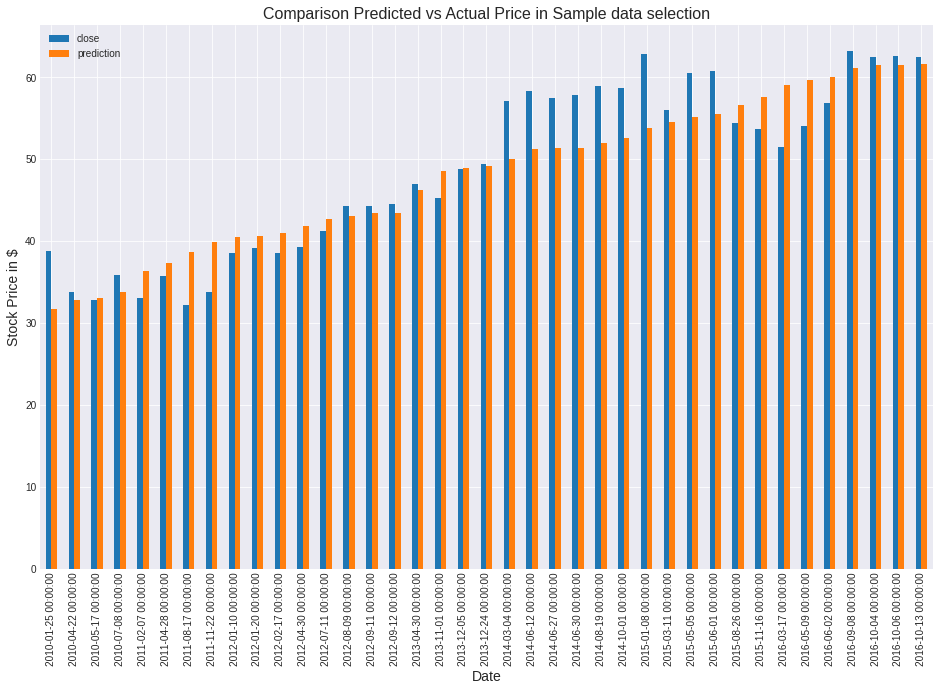

In [ ]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
df_sample.plot(x='date', y=['close', 'prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

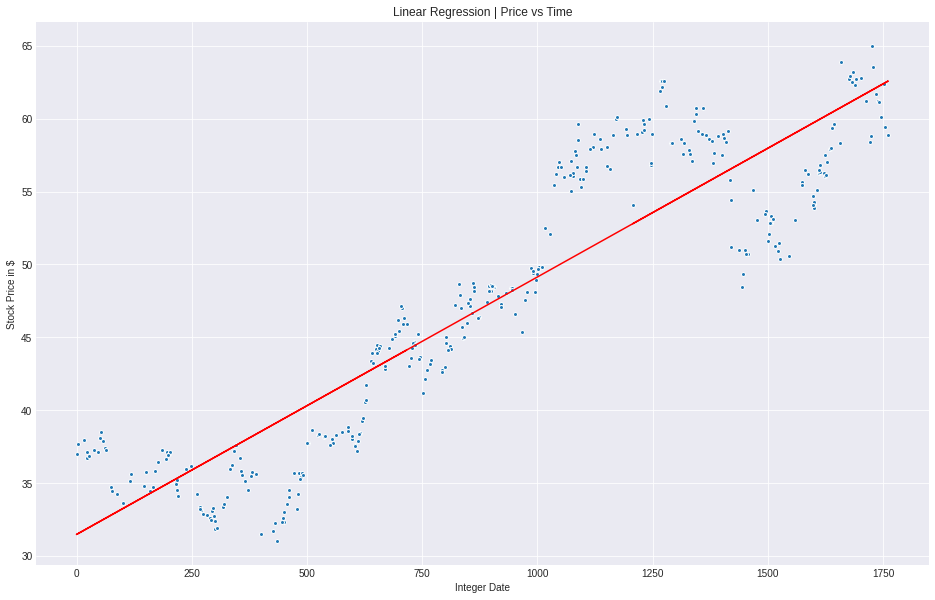

In [ ]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

### Error evaluation metrics

In [ ]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.2910614397965174
Mean Squared Error: 16.01147713142323
Root Mean Squared Error: 4.001434384245633


In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.8265270082175852


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.8265281007799086

## **Deployment**
At this phase, final report and presentation of the found results are produced. The model can be saved and can be deploy in real work application to forecast the stock price.

In [ ]:
# Importing pickle to save the model that we trained
import pickle

# Save the model to disk
filename = 'linear_regression_stock_price.sav'
pickle.dump(model, open(filename, 'wb'))